### 01-02. Keras 설치 방법

**설치 명령어**

In [1]:
# Keras, TensorFlow, Matplotlib 라이브러리 설치
!pip install keras tensorflow matplotlib

---

## 02. DNN 구성 요소

### 02-01. 레이어 (Layer)

- 신경망의 기본 단위로, 입력 데이터를 변환하여 출력으로 전달한다.
- **Dense Layer**: 모든 입력 뉴런이 모든 출력 뉴런과 연결된 완전 연결 층이다.

### 02-02. 활성화 함수 (Activation Function)

- 레이어의 출력을 비선형적으로 변환하여 모델의 표현력을 향상한다.
- **주요 활성화 함수**
    - **ReLU**: Rectified Linear Unit, $f(x)=\max (0, x)$
    - **시그모이드(Sigmoid)** : $f(x)=\frac{1}{1+e^{-x}}$
    - **tanh**: 하이퍼볼릭 탄젠트 함수

### 02-03. 손실 함수 (Loss Function)

- **손실 함수**: 모델의 예측 값과 실제 값 사이의 오차를 수치화 한다.
    - **회귀 문제**: MSE, MAE 등
    - **분류 문제**: Binary Crossentropy, Categorical Crossentropy 등

### 02-04. 옵티마이저 (Optimizer)

- **옵티마이저**: 손실 함수를 최소화하여 가중치를 업데이트하는 알고리즘이다.
    - **SGD**, **Adam**, **RMSprop** 등이 있다.

---

## 03. Keras로 DNN 모델 구현하기

### 03-01. 데이터 준비

- **예제 데이터셋: MNIST 손글씨 숫자 데이터**
    - 0부터 9까지의 손글씨 이미지로 구성된 데이터셋이다.
    - 각 이미지는 28x28 픽셀의 그레이스케일 이미지이다.
- **데이터 로드 및 전처리**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화 (0~1 사이 값으로 변환)
# 28x28 이미지를 784차원 1차원 배열로 펼치고 실수형으로 변환
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# 레이블 원-핫 인코딩 (0~9까지의 숫자를 10개 클래스 벡터로 변환)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 03-02. 모델 구성

- **Sequential API를 사용한 모델 정의**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 순차적 모델 생성
model = Sequential()
# 입력층 및 첫 번째 은닉층: 512개 노드, 활성화 함수 ReLU, 입력 크기 784
model.add(Dense(512, activation='relu', input_shape=(784,)))
# 두 번째 은닉층: 256개 노드, 활성화 함수 ReLU
model.add(Dense(256, activation='relu'))
# 출력층: 10개 노드 (클래스 개수), 활성화 함수 Softmax (다중 분류)
model.add(Dense(10, activation='softmax'))

/Users/jy/SKN23/multimodal/multi_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- **모델 요약 출력**

In [4]:
# 모델 구조 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

![Standard DNN model](https://www.researchgate.net/figure/Standard-DNN-model-23_fig3_351335975)

출처: https://www.researchgate.net/figure/Standard-DNN-model-23_fig3_351335975

### 03-03. 모델 컴파일

- **손실 함수와 옵티마이저 설정**
    - **손실 함수**: `categorical_crossentropy` (다중 클래스 분류에 사용)
    - **옵티마이저**: `adam` (Adaptive Moment Estimation)

In [5]:
# 모델 컴파일
# optimizer: 최적화 알고리즘 (Adam)
# loss: 손실 함수 (다중 분류를 위한 범주형 교차 엔트로피)
# metrics: 평가 지표 (정확도)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 03-04. 모델 학습

- **에포크(Epoch)**: 전체 데이터셋을 학습하는 횟수
- **배치 크기**: 한 번의 업데이트에 사용되는 샘플 수
- **검증 분할**: 전체 데이터의 20%를 검증용으로 사용

In [6]:
# 모델 학습
# x_train, y_train: 학습 데이터와 레이블
# epochs: 전체 데이터셋 반복 횟수 10회
# batch_size: 가중치 업데이트 한 번당 샘플 수 128개
# validation_split: 학습 데이터의 20%를 검증 데이터로 사용
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9243 - loss: 0.2563 - val_accuracy: 0.9644 - val_loss: 0.1198
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9715 - loss: 0.0942 - val_accuracy: 0.9714 - val_loss: 0.0883
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0575 - val_accuracy: 0.9739 - val_loss: 0.0857
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0385 - val_accuracy: 0.9767 - val_loss: 0.0817
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9911 - loss: 0.0281 - val_accuracy: 0.9770 - val_loss: 0.0836
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0209 - val_accuracy: 0.9782 - val_loss: 0.0807
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0148 - val_accuracy: 0.9785 - val_loss: 0.0876
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0148 - val_accuracy: 0.

---

## 04. 모델 평가와 예측

### 04-01. 모델 평가

In [7]:
# 테스트 데이터를 사용한 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실 값:', test_loss)
print('테스트 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9788 - loss: 0.0831
테스트 손실 값: 0.08308449387550354
테스트 정확도: 0.9787999987602234


### 04-02. 예측 결과 확인

- **테스트 데이터의 첫 번째 이미지 예측**

In [8]:
import numpy as np

# 테스트 데이터에 대한 예측 수행
predictions = model.predict(x_test)

# 첫 번째 데이터의 예측값(가장 확률 높은 인덱스)과 실제값 비교
predicted_label = np.argmax(predictions[0])
true_label = np.argmax(y_test[0])

print('예측된 레이블:', predicted_label)
print('실제 레이블:', true_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
예측된 레이블: 7
실제 레이블: 7


### 04-03. 학습 곡선 시각화

- **훈련 손실과 검증 손실 그래프**

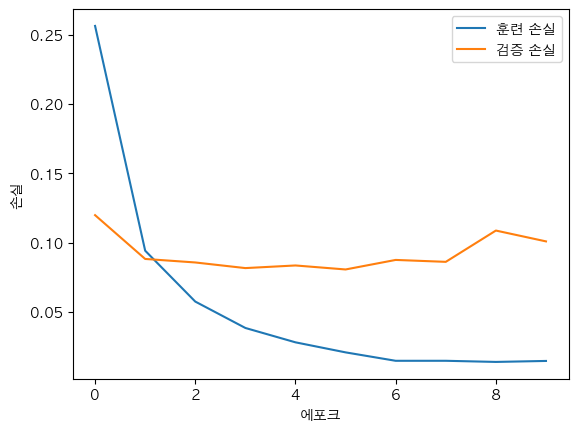

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프 한글 폰트 설정 (필요 시 주석 해제하여 사용)
mpl.rcParams['font.family'] = 'APPLEGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 손실(Loss) 그래프 시각화
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.legend()
plt.show()

- **훈련 정확도와 검증 정확도 그래프**

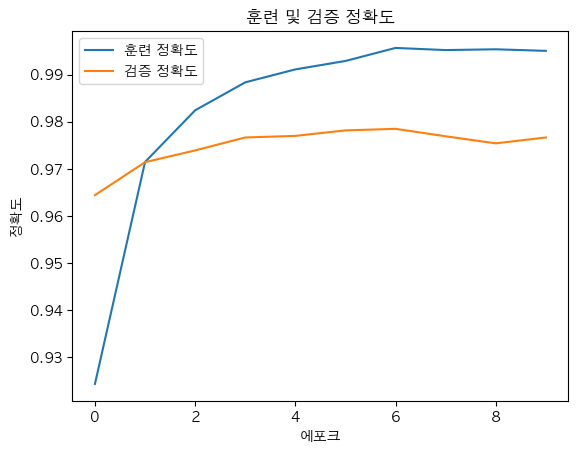

In [10]:
# 정확도(Accuracy) 그래프 시각화
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('훈련 및 검증 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.show()

---

## 05. 모델 개선과 최적화

### 05-01. 과적합 방지 기법

- **드롭아웃(Dropout) 적용**
    - 일부 뉴런을 랜덤하게 비활성화하여 모델의 일반화 능력을 향상시킨다.

In [11]:
from tensorflow.keras.layers import Dropout

# 드롭아웃을 적용한 새로운 모델 정의
model = Sequential()
# 첫 번째 은닉층 후 20% 뉴런 비활성화
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
# 두 번째 은닉층 후 20% 뉴런 비활성화
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# 출력층
model.add(Dense(10, activation='softmax'))

### 05-02. 옵티마이저와 학습률 조정

In [12]:
from tensorflow.keras.optimizers import SGD

# SGD 옵티마이저 사용 (학습률 0.01, 모멘텀 0.9 적용)
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 05-03. 조기 종료 (Early Stopping)

- **콜백 함수로 조기 종료 적용**
    - 검증 손실이 증가하면 학습을 조기 종료하여 과적합을 방지한다.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# 조기 종료 설정: 검증 손실(val_loss)을 모니터링하며 2 에포크 동안 개선이 없으면 중단
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# 학습 실행 (콜백 추가)
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8387 - loss: 0.5429 - val_accuracy: 0.9331 - val_loss: 0.2349
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9282 - loss: 0.2479 - val_accuracy: 0.9514 - val_loss: 0.1716
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9454 - loss: 0.1853 - val_accuracy: 0.9592 - val_loss: 0.1401
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9553 - loss: 0.1511 - val_accuracy: 0.9642 - val_loss: 0.1211
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9619 - loss: 0.1286 - val_accuracy: 0.9682 - val_loss: 0.1103
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1118 - val_accuracy: 0.9712 - val_loss: 0.0995
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9702 - loss: 0.0984 - val_accuracy: 0.9727 - val_loss: 0.0925
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0873 - val_accuracy: 0.